### Model Training


#### 1.1 Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [23]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, Ridge,Lasso
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

Import the CSV Data as Pandas DataFrame

In [24]:
df = pd.read_csv('data/mushrooms.csv')

Show Top 5 Records

In [25]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [26]:
for col in df.columns:
    print(f"Categories in `{col}` variable: {df[col].unique()}", end='\n')

Categories in `class` variable: ['p' 'e']
Categories in `cap-shape` variable: ['x' 'b' 's' 'f' 'k' 'c']
Categories in `cap-surface` variable: ['s' 'y' 'f' 'g']
Categories in `cap-color` variable: ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
Categories in `bruises` variable: ['t' 'f']
Categories in `odor` variable: ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
Categories in `gill-attachment` variable: ['f' 'a']
Categories in `gill-spacing` variable: ['c' 'w']
Categories in `gill-size` variable: ['n' 'b']
Categories in `gill-color` variable: ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
Categories in `stalk-shape` variable: ['e' 't']
Categories in `stalk-root` variable: ['e' 'c' 'b' 'r' '?']
Categories in `stalk-surface-above-ring` variable: ['s' 'f' 'k' 'y']
Categories in `stalk-surface-below-ring` variable: ['s' 'f' 'y' 'k']
Categories in `stalk-color-above-ring` variable: ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
Categories in `stalk-color-below-ring` variable: ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' '

Encoding of data

In [27]:
from sklearn.preprocessing import LabelEncoder

encoded = LabelEncoder()

for col in df.columns:
    df[col] = encoded.fit_transform(df[[col]])


Preparing X and Y variables

In [28]:
X = df.drop(columns=['class'], axis=1)

In [29]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [30]:
y = df['class']
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int64

In [31]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 23 numerical features : ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']

We have 0 categorical features : []


In [32]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((6499, 22), (1625, 22))

In [34]:
def evaluate_model(true, predicted):
    clf_report = classification_report(true, predicted)
    matrix_confusion = confusion_matrix(true, predicted)
    score = accuracy_score(true, predicted)
    return clf_report, matrix_confusion, score

In [40]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Support Vector Classifier": SVC(),
    "XGBClassifier": XGBClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier() 
}

model_list = []
accuracy = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    #Training
    model.fit(X_train, y_train)

    #Prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    #Evaluation
    model_train_report, model_train_matrix, model_train_score = evaluate_model(y_train, y_train_pred.round())
    model_test_report, model_test_matrix, model_test_score = evaluate_model(y_test, y_test_pred.round())

    print(list("-"*25 + models.keys())[i] + "-"*25)
    model_list.append(list(models.keys())[i])

    print("Model perfromance for the Training set")
    print("- Classification Report: {}".format(model_train_report))
    print("- Confusion Matrix: {}".format(model_train_matrix))
    print("- Accuracy Score: {:.4f}".format(model_train_score))

    print("-"*35)

    print("Model performance for the Testing set")
    print("- Classification Report: {}".format(model_test_report))
    print("- Confusion Matrix: {}".format(model_test_matrix))
    print("- Accuracy Score: {:.4f}".format(model_test_score))

    accuracy.append(model_test_score)

    print("="*35)
    print("\n")

Logistic Regression
Model perfromance for the Training set
- Classification Report:               precision    recall  f1-score   support

           0       0.95      0.96      0.95      3365
           1       0.96      0.94      0.95      3134

    accuracy                           0.95      6499
   macro avg       0.95      0.95      0.95      6499
weighted avg       0.95      0.95      0.95      6499

- Confusion Matrix: [[3234  131]
 [ 179 2955]]
- Accuracy Score: 0.9523
-----------------------------------
Model performance for the Testing set
- Classification Report:               precision    recall  f1-score   support

           0       0.95      0.95      0.95       843
           1       0.94      0.95      0.95       782

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625

- Confusion Matrix: [[798  45]
 [ 40 742]]
- Accuracy Score: 0.9477


Lasso
Model perfroman

In [41]:
pd.DataFrame(list(zip(model_list, accuracy)), columns=['Model Name', 'Accuracy Score']).sort_values(by=['Accuracy Score'], ascending=False)

,Model Name,Accuracy Score
4,Decision Tree,1.000000
7,XGBClassifier,1.000000
8,AdaBoost Classifier,1.000000
5,Random Forest Classifier,1.000000
3,K-Neighbors Classifier,0.996308
6,Support Vector Classifier,0.992615
0,Logistic Regression,0.947692
2,Ridge,0.944615
1,Lasso,0.518769


#### Logistic Regresion

In [48]:
log_model = LogisticRegression(fit_intercept=True)
log_model = log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
score = accuracy_score(y_test, y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 94.77


In [51]:
pred_df = pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
1971,0,0,0
6654,1,1,0
5606,1,1,0
3332,0,0,0
6988,1,1,0
...,...,...,...
7374,1,1,0
1149,0,0,0
4999,1,1,0
7497,1,1,0


In [52]:
y_pred_prob = log_model.predict_proba(X_test)[:,1]
y_pred_prob

array([3.00132184e-07, 9.06172668e-01, 9.99949464e-01, ...,
       9.99973936e-01, 9.55945092e-01, 8.77536003e-01])

In [55]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
def reports():
    print(f"Thresholds : \n{thresholds}\n")
    print(f"False Positive Rate : \n{fpr}n")
    print(f"True Positive Rate : \n{tpr}")
reports()

Thresholds : 
[           inf 9.99979094e-01 9.97621688e-01 9.97508825e-01
 9.96431674e-01 9.96201254e-01 9.96101323e-01 9.96072078e-01
 9.95748167e-01 9.95730033e-01 9.95692807e-01 9.95660511e-01
 9.94978545e-01 9.94946560e-01 9.94232391e-01 9.94030958e-01
 9.93575194e-01 9.93389224e-01 9.92507223e-01 9.92422350e-01
 9.81438865e-01 9.81308197e-01 9.63132917e-01 9.62721108e-01
 9.41986587e-01 9.41772345e-01 9.32275744e-01 9.31882034e-01
 9.21789046e-01 9.21714727e-01 8.77536003e-01 8.77287773e-01
 8.73519858e-01 8.71151706e-01 8.65082641e-01 8.64097888e-01
 8.59845226e-01 8.57167380e-01 8.53590933e-01 8.44118845e-01
 8.38984582e-01 8.33844420e-01 8.19624492e-01 8.18498459e-01
 8.17244699e-01 8.09193483e-01 7.94226488e-01 7.92645335e-01
 7.87979648e-01 7.83322184e-01 7.80987156e-01 7.76062260e-01
 7.67771041e-01 7.62569389e-01 7.50234438e-01 7.38987226e-01
 7.17930631e-01 7.17113659e-01 6.72776438e-01 6.69761151e-01
 6.58668729e-01 6.57301630e-01 6.31592042e-01 6.31251591e-01
 6.0031848

In [56]:
roc_auc = auc(fpr, tpr)
roc_auc

np.float64(0.9803254119224667)

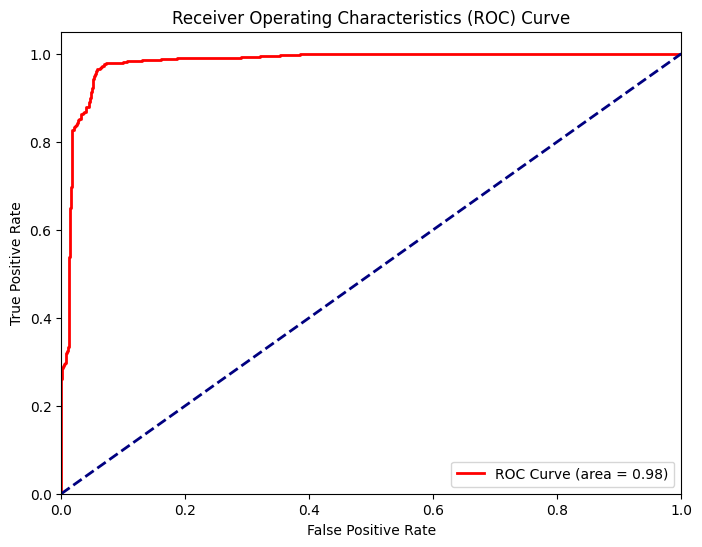

In [57]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color="red", linewidth=2, label="ROC Curve (area = %0.2f)" % roc_auc)
plt.plot([0,1],[0,1], color='navy', linewidth=2, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristics (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

#### Decision Tree Classifier

In [58]:
dt_model = DecisionTreeClassifier()
dt_model = dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
score = accuracy_score(y_test, y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 100.00


In [59]:
pred_df = pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
1971,0,0,0
6654,1,1,0
5606,1,1,0
3332,0,0,0
6988,1,1,0
...,...,...,...
7374,1,1,0
1149,0,0,0
4999,1,1,0
7497,1,1,0


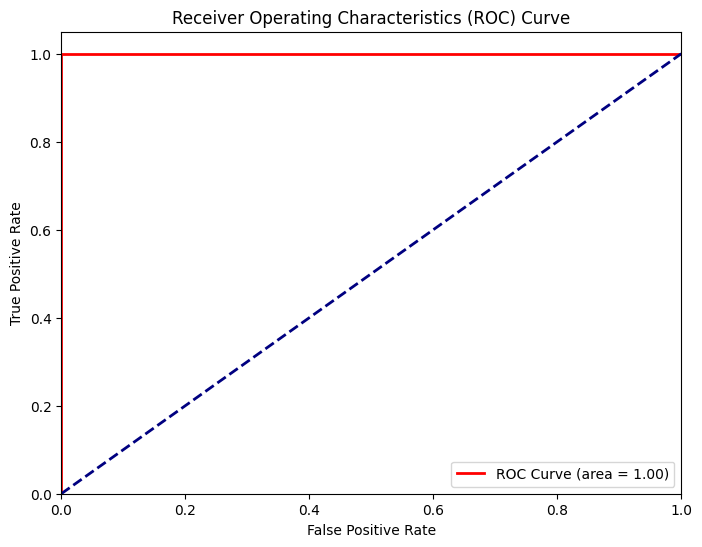

In [60]:
y_pred_prob = dt_model.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

def reports():
    print(f"Thresholds : \n{thresholds}\n")
    print(f"False Positive Rate : \n{fpr}n")
    print(f"True Positive Rate : \n{tpr}")

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color="red", linewidth=2, label="ROC Curve (area = %0.2f)" % roc_auc)
plt.plot([0,1],[0,1], color='navy', linewidth=2, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristics (ROC) Curve")
plt.legend(loc="lower right")
plt.show()